### IMPORT LIBRARIES

In [63]:
# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

### SETTING UP DATA

In [64]:
import pandas as pd

# Load the Excel file into a DataFrame
file_path = 'ssdb_data_2022.xlsx'  # Assuming the file is in the current directory

dfi = pd.read_excel(file_path, sheet_name='INCIDENT')
dfs = pd.read_excel(file_path, sheet_name='SHOOTER')
dfv = pd.read_excel(file_path, sheet_name='VICTIM')
dfw = pd.read_excel(file_path, sheet_name='WEAPON')
# Display the first few rows of the DataFrame
dfi.head()


,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,No,NaN,No,100,No
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,No,NaN,No,99,No
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,NaN,No,No,No,No,No,NaN,No,1,No
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No


### DATA CLEANING

In [65]:
dfi.rename(lambda x: x.lower(), axis='columns', inplace=True)
dfs.rename(lambda x: x.lower(), axis='columns', inplace=True)
dfv.rename(lambda x: x.lower(), axis='columns', inplace=True)
dfw.rename(lambda x: x.lower(), axis='columns', inplace=True)

In [66]:
dfi.columns


Index(['incident_id', 'sources', 'number_news', 'media_attention',
       'reliability', 'date', 'quarter', 'school', 'city', 'state',
       'school_level', 'location', 'location_type', 'during_school',
       'time_period', 'first_shot', 'summary', 'narrative', 'situation',
       'targets', 'accomplice', 'hostages', 'barricade', 'officer_involved',
       'bullied', 'domestic_violence', 'gang_related', 'preplanned',
       'shots_fired', 'active_shooter_fbi'],
      dtype='object')

In [67]:
dfi['date'] = dfi['date'].astype('datetime64[ns]')
dfi['year'] = dfi['date'].dt.year

In [68]:
dfi = dfi.drop_duplicates()


In [69]:
# Summary statistics for numerical columns
print(dfi.describe())


       reliability         year
count  2069.000000  2069.000000
mean      2.766554  2005.714355
std       0.996184    15.432015
min       1.000000  1970.000000
25%       2.000000  1993.000000
50%       2.000000  2010.000000
75%       4.000000  2020.000000
max       5.000000  2022.000000


### STATISTICAL SUMMARY

In [70]:
# Value counts for 'state' to see the distribution of incidents geographically
print(dfi['state'].value_counts())

# Value counts for 'school_level' to understand the distribution across different school levels
print(dfi['school_level'].value_counts())

statistical_summary = dfi.describe()

print(statistical_summary)

CA    215
TX    177
FL    120
IL    113
PA     88
MI     87
OH     86
NY     76
GA     72
NC     69
TN     68
MD     62
AL     61
LA     57
VA     50
WA     47
MO     47
SC     45
IN     40
DC     34
AR     29
CO     29
WI     26
MS     26
KY     24
OR     24
CT     23
NM     21
NJ     21
MN     20
AZ     19
OK     19
MA     19
KS     18
NV     18
UT     17
IA     17
NE     11
DE     11
MT      9
NH      8
RI      7
AK      6
ID      6
SD      5
WV      5
ME      5
VT      3
ND      3
HI      3
WY      2
VI      1
Name: state, dtype: int64
High           1302
Elementary      358
Middle          205
Junior High      66
K-8              33
Other            32
K-12             30
6-12             13
Unknown           6
Name: school_level, dtype: int64
       reliability         year
count  2069.000000  2069.000000
mean      2.766554  2005.714355
std       0.996184    15.432015
min       1.000000  1970.000000
25%       2.000000  1993.000000
50%       2.000000  2010.000000
75%       4.00000

In [83]:
import plotly.express as px
import pandas as pd

data = {
    'State': ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'Michigan', 'North Carolina',
              'Tennessee', 'Maryland', 'Alabama', 'Louisiana', 'Virginia', 'Washington', 'Missouri', 'South Carolina', 'Indiana', 'Massachusetts'],
    'Incidents': [215, 177, 120, 76, 88, 113, 86, 72, 87, 69, 68, 62, 61, 57, 50, 47, 47, 45, 40, 19]
}

df_states = pd.DataFrame(data)

# Sort the data and select the top 10 states with the highest number of incidents
df_top10 = df_states.sort_values('Incidents', ascending=False).head(10)



# Or if you want to choose a different color scale
fig = px.bar(df_top10, x='State', y='Incidents', title='Top 10 States with the Highest School Shooting Incidents',
             labels={'Incidents': 'Number of Incidents'}, color='Incidents', 
             color_continuous_scale=px.colors.sequential.Inferno)

fig.show()


In [71]:
import plotly.express as px
import pandas as pd


data = {
    'State': ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'Michigan', 'North Carolina', 
              'Tennessee', 'Maryland', 'Alabama', 'Louisiana', 'Virginia', 'Washington', 'Missouri', 'South Carolina', 'Indiana', 'Massachusetts'],
    'Incidents': [215, 177, 120, 76, 88, 113, 86, 72, 87, 69, 68, 62, 61, 57, 50, 47, 47, 45, 40, 19]
}

df_states = pd.DataFrame(data)

# Sort the data and select the top 10 states with the highest number of incidents
df_top10 = df_states.sort_values('Incidents', ascending=False).head(10)

# Create a bar chart to visualize the top 10 states with the highest number of incidents
fig = px.bar(df_top10, x='State', y='Incidents', title='Top 10 States with the Highest School Shooting Incidents',
             labels={'Incidents': 'Number of Incidents'}, color='Incidents', color_continuous_scale=px.colors.sequential.Greens)

fig.show()



In [72]:
import pandas as pd
import plotly.express as px

# Assuming dfi is already loaded with your dataset including a 'state' column
# Count the number of incidents per state
incident_counts = dfi['state'].value_counts()

# Convert the Series to a DataFrame
df_states = incident_counts.reset_index()
df_states.columns = ['State', 'Incidents']

# Sort by incidents and select the bottom 10 states
df_bottom10 = df_states.sort_values(by='Incidents', ascending=True).head(10)

# Create a bar chart to visualize the 10 states with the least number of incidents
fig = px.bar(df_bottom10, x='State', y='Incidents', title='Top 10 States with the Least School Shooting Incidents',
             labels={'Incidents': 'Number of Incidents'}, color='Incidents', color_continuous_scale=px.colors.sequential.OrRd)

# Show the figure
fig.show()


### CORRELATION MATRIX

Low Correlation between Media Attention and Reliability: The correlation between the amount of media attention (Number_News) and the reliability of the data (Reliability) is low. This suggests that the reliability of the incident reporting is not strongly influenced by how much media attention the incident receives. In practical terms, incidents with high media coverage are not necessarily reported with higher or lower reliability than those with less coverage.

Shots Fired Not Included in the Final Matrix: The absence of the Shots_Fired column in the final correlation matrix indicates an issue with including this variable in our correlation analysis, likely due to data formatting or missing values. Thus, any insights regarding the relationship between the intensity of an incident and media attention or data reliability could not be assessed directly from this analysis.

Potential for Further Analysis with Additional Data: The correlation matrix hints at a more complex landscape that might require additional data for a fuller understanding. For instance, incorporating variables that were not available in our analysis (e.g., Injuries, Fatalities) could offer more insights into how different aspects of school shootings are interrelated.

Opportunity for Broader Analysis Beyond Correlation: The findings suggest an opportunity for a broader analysis that includes categorical variables and potentially employs other statistical or machine learning techniques to uncover patterns or predictive factors in school shooting incidents.

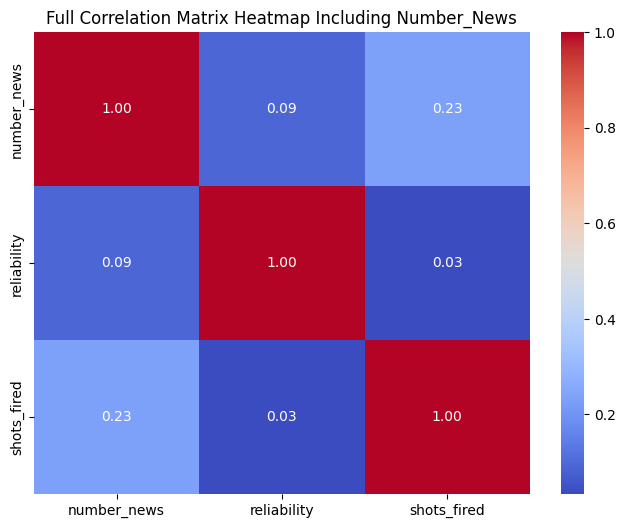

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to convert strings to numeric values
def convert_to_numeric(value):
    try:
        return float(value)
    except ValueError:
        return None  # Convert non-numeric values to NaN

# Apply the conversion function to the specified columns
dfi['number_news'] = dfi['number_news'].apply(convert_to_numeric)
dfi['reliability'] = dfi['reliability'].apply(convert_to_numeric)
dfi['shots_fired'] = dfi['shots_fired'].apply(convert_to_numeric)

# Drop rows with NaN values in any of the selected columns
dfi.dropna(subset=['number_news', 'reliability', 'shots_fired'], how='any', inplace=True)

# Recalculate the correlation matrix
correlation_matrix_full = dfi[['number_news', 'reliability', 'shots_fired']].corr()

# Visualize the full correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
heatmap_full = sns.heatmap(correlation_matrix_full, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Full Correlation Matrix Heatmap Including Number_News")
plt.show()


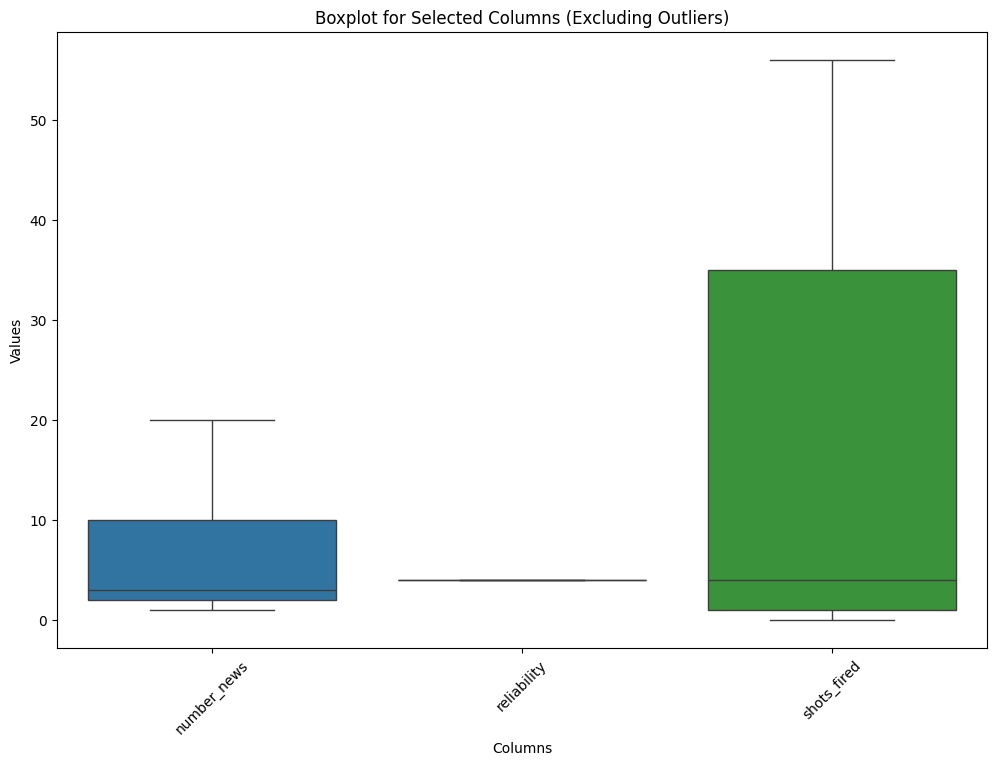

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns for which you want to create boxplots
columns_for_boxplot = ['number_news', 'media_attention', 'reliability', 'shots_fired']

# Create boxplots for each column
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=dfi[columns_for_boxplot], showfliers=False)
plt.title('Boxplot for Selected Columns (Excluding Outliers)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()


# EXPLORATORY DATA ANALYSIS

### **School Shootings over the Years**

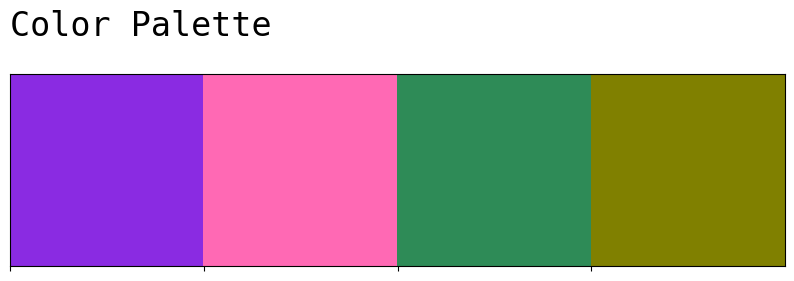

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the new colors
colors = ['#8A2BE2', '#FF69B4', '#2E8B57', '#808000']

# Create a color palette using the new colors
palette = sns.color_palette(palette=colors)

# Display the color palette
sns.palplot(palette, size=2.5)

# Add text to the plot
plt.text(-0.5,
         -0.7,
         'Color Palette',
         {'font': 'monospace',
          'size': 24,
          'weight': 'normal'}
         )

plt.show()


In [76]:
def format_title(title, subtitle=None, subtitle_font=None, subtitle_font_size=None):
    title = f'<b>{title}</b>'
    if not subtitle:
        return title
    subtitle = f'<span style="font-family: {subtitle_font}; font-size: {subtitle_font_size}px;">{subtitle}</span>'
    return f'{title}<br>{subtitle}'

In [77]:
import pandas as pd
import plotly.graph_objects as go

# Assume dfi is your DataFrame and it contains a 'date' column with date information.

# Convert 'date' column to datetime if it's not already in that format
dfi['date'] = pd.to_datetime(dfi['date'], errors='coerce')

# Extract the year from the 'date' column and create a new 'year' column
dfi['year'] = dfi['date'].dt.year

# Now group by the 'year' column to count incidents
incident_counts_by_year = dfi.groupby('year')['incident_id'].count().reset_index()

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=incident_counts_by_year['year'],
    y=incident_counts_by_year['incident_id'],
    line=dict(color='#E84545', width=3, dash='solid')
))

# Update the layout to add titles and axis labels
fig.update_layout(
    title='School Shootings over the Years',
    title_font={'size': 24, 'family': 'Proxima Nova'},
    template='plotly_dark',
    paper_bgcolor='#2B2E4A',
    plot_bgcolor='#808000',
    height=600,
    xaxis=dict(
        title='Year',
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        title='Number of Incidents',
        showgrid=True,
        zeroline=True,
        showline=True,
        showticklabels=True,
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False
)

# Show the figure
fig.show()



In [78]:
import pandas as pd
import plotly.graph_objects as go

# Assuming dfi is your DataFrame and it contains the 'incident_id' and 'date' columns.

# Convert 'date' column to datetime if it's not already in that format
dfi['date'] = pd.to_datetime(dfi['date'], errors='coerce')

# Extract the year from the 'date' column
dfi['year'] = dfi['date'].dt.year

# Group by the 'year' column to count incidents
incident_counts_by_year = dfi.groupby('year')['incident_id'].count().reset_index()

# Create the plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=incident_counts_by_year['year'],
    y=incident_counts_by_year['incident_id'],
    line=dict(color='#E84545', width=3, dash='solid')
))

# Update the layout to add titles and axis labels
fig.update_layout(
    title='School Shootings over the Years',
    title_font={'size': 24, 'family': 'Proxima Nova'},
    template='plotly_dark',
    paper_bgcolor='#2B2E4A',
    plot_bgcolor='#808000',
    height=600,
    xaxis=dict(
        title='Year',
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        title='Number of Incidents',
        showgrid=True,
        zeroline=True,
        showline=True,
        showticklabels=True,
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False
)

# Show the figure
fig.show()


Long-term Trend: Over the past decades, the frequency of school shootings has generally been low but with some variability.
Recent Increase: There is a sharp increase in incidents in the most recent years shown on the chart, indicating a concerning rise in school shootings.
Intermittent Peaks: There are intermittent peaks throughout the timeline, suggesting sporadic years with higher numbers of incidents.

### School Shootings by School Levels

In [30]:
lvls = dfi.school_level.unique().tolist()
lvls = ['High', 'Elementary', 'Middle', 'Junior High' , 'K-8', 'K-12', '6-12']

In [31]:
_ = [ dfi[dfi.school_level == l].groupby('year')['incident_id'].count().reset_index() for l in lvls]

x = 0
fig = go.Figure()

color = ['#8A2BE2', '#FF69B4', '#2E8B57', '#808000', '#E9A6A6', '#864879']

for l in lvls:
    if (x == 0) | (x == 1) | (x == 2):
        fig.add_trace(go.Scatter(x = _[x]['year'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = color[x],
                                             width = 3,
                                             dash = 'solid'),
                                 name = l,
                                ))
        
    else:
         fig.add_trace(go.Scatter(x = _[x]['year'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = '#903749',
                                             width = 1,
                                             dash = 'solid'),
                                 name = l))
            
    x += 1

    
title = format_title('School Shootings by School Levels')

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 600
                 )

fig.show()



### Primary Factors that Led to Shooting

In [32]:
# Cleaning duplicate data
dfi['situation'] = dfi['situation'].replace('Murder/Suicide ', 'Murder/Suicide')
dfi.situation.unique()

array([nan, 'Escalation of Dispute', 'Accidental',
       'Intentional Property Damage', 'Indiscriminate Shooting',
       'Drive-by Shooting', 'Illegal Activity', 'Suicide/Attempted',
       'Officer-Involved Shooting', 'Domestic w/ Targeted Victim',
       'Hostage/Standoff', 'Psychosis', 'Unknown', 'Bullying'],
      dtype=object)

In [33]:
_ = dfi.groupby('situation')['incident_id'].count().sort_values(ascending=True).reset_index()
_['percent'] = _['incident_id'].apply(lambda x: round(x*100/(dfi.time_period.count()), 2) )

fig = px.bar(_, 
                   y="situation",
                   x='incident_id',
                   orientation='h',
                   text_auto=True,
                   template="plotly_dark"
                   )

fig.update_layout(title='<b>Primary Factors that Led to the Shooting<b>',
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2E8B57',
                  yaxis_title=None,
                  xaxis_title='% of All School Shootings'
                 )

fig.add_vline(
    x = _.incident_id.mean(),
    line_width = 2,
    line_dash = 'dash',
    annotation_text = round(_.incident_id.mean(), 0),
    annotation_position = 'top',
)

color = ['#AF2D2D',]*17
for c in range(12,17):
    color[c] = '#F05454'

fig.update_traces(textfont_size=12,
                  textangle=0,
                  textposition='outside',
                  cliponaxis=False,
                  marker_color=color,
                 )

fig.show()

Most Prevalent Factors: The 'Escalation of Dispute' is by far the most common factor, contributing to 20% of the shootings. 'Drive-by Shooting' and 'Accidental' factors follow, each accounting for roughly 38% of the total number when combined. These suggest that confrontations and unintended discharges are significant contributors to school shootings.

Mental Health Concerns: 'Suicide/Attempted' and 'Psychosis' factors are also present, suggesting that mental health issues play a role in a notable proportion of these incidents.

Criminal Activity: 'Illegal Activity' is associated with a similar percentage as 'Suicide/Attempted', indicating that criminal actions within or around schools can escalate to violence.

Bullying: Bullying appears as a smaller but still significant factor, which could indicate that some shootings are responses to long-term harassment or social issues within schools.

Targeted Violence: 'Domestic w/ Targeted Victim' implies that some incidents may be focused on specific individuals, possibly resulting from personal disputes extending into the school environment.

Rarer Factors: Factors like 'Officer-Involved Shooting', 'Murder/Suicide', and 'Anger Over Grade/Suspension/Discipline' are listed as well, though they represent a very small percentage of the total. This indicates that while such motives are far less common, they still occur and need to be considered when implementing preventative measures.

Unknown Motives: A number of incidents are marked as 'Unknown', highlighting that in several cases, the exact motives behind the shootings are not clearly understood. This underscores the complexity of the issue and the challenges in preventing such incidents.

Policy Implications: The range of factors suggests a multifaceted problem requiring a combination of approaches to address, including dispute resolution programs, mental health support, better gun safety and control measures, anti-bullying campaigns, and improved security in schools.

Data Representation: The visualization suggests that to reduce the number of school shootings, interventions could be prioritized to target the most common contributing factors

### Male and Female Victims

In [34]:
_ = dfi[['incident_id', 'situation']]
dfv.rename(columns = {'incidentid': 'incident_id'}, inplace=True)

dfv = pd.merge(
    _,
    dfv,
    on = 'incident_id',
    how = 'right', 
)

In [35]:
genders = ['Male', 'Female']
_ = [ dfv[dfv.gender == g].groupby('situation')['incident_id'].count().reset_index() for g in genders]

x = 0
fig = go.Figure()


for g in genders:
    if (x == 0):
        fig.add_trace(go.Scatter(x = _[x]['situation'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = 'cornflowerblue',
                                             width = 3,
                                             dash = 'solid'),
                                 name = g,
                                ))
        
    else:
         fig.add_trace(go.Scatter(x = _[x]['situation'],
                                 y = _[x]['incident_id'],
                                 line = dict(color = 'lightpink',
                                             width = 3,
                                             dash = 'solid'),
                                 name = g))
            
    x += 1

title = format_title('Male vs Female Victims',
                     
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 800
                 )

fig.show()

Gender Disparity: The chart exhibits a significant gender disparity for certain types of incidents. Notably, in incidents classified as 'Escalation of Dispute,' there is a pronounced peak in male victims, suggesting that such scenarios disproportionately affect males. This could indicate that males are more often involved in or affected by confrontational situations that escalate to violence.

Drive-by Shootings and Accidental Incidents: Both drive-by shootings and accidental shootings show similar victim counts for males and females, indicating a more equal gender distribution for these types of incidents.

Domestic Situations: For 'Domestic w/ Targeted Victim,' the numbers are relatively even, suggesting that domestic issues leading to school shootings impact males and females nearly equally.

High-Stakes Situations: The 'Hostage/Siege/Standoff' category shows a notably higher count of male victims, which could reflect the dynamics of these tense situations where males are more frequently the victims.

Illegal Activity and Indiscriminate Shooting: These factors show a slight male predominance, hinting at a gender-specific risk in situations involving criminal behavior or random acts of violence.

Mental Health Concerns: The line for 'Psychosis' indicates an equal number of male and female victims, whereas 'Suicide/Attempted' shows a moderate increase in male victims.

Murder/Suicide: In cases of murder/suicide, there's a notable difference in victim count, with male victims being more prevalent.

Rare Factors: For categories like 'Officer-Involved Shooting' and 'Anger Over Grade/Suspension/Discipline,' the numbers are low, which suggests these are less common scenarios, but still show a tendency towards male victims.

Data Uncertainty: The category 'Unknown' reflects incidents where the gender of victims is not specified or data is missing. It's important to consider this when analyzing the data, as it may affect the overall understanding of the gender distribution

# "What are the trends and patterns in school shootings across the United States over the years, taking into account seasonal variations, and how do these incidents correlate with school levels and the gender distribution of victims?"

In [37]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming df has columns 'date', 'school_level', 'gender', and 'incident_id'
dfi['year'] = pd.to_datetime(dfi['date']).dt.year
dfi['month'] = pd.to_datetime(dfi['date']).dt.month_name()

# Create subplots: one for trend and another for seasonal variation
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.1, subplot_titles=('Yearly Trend of Incidents', 'Monthly Distribution of Incidents'))

# Yearly trend subplot
yearly_data = dfi.groupby('year')['incident_id'].count().reset_index()
fig.add_trace(go.Scatter(x=yearly_data['year'], y=yearly_data['incident_id'], mode='lines+markers', name='Yearly Trend'), row=1, col=1)

# Monthly distribution subplot
monthly_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = dfi.groupby('month')['incident_id'].count().reindex(monthly_order).reset_index()
fig.add_trace(go.Bar(x=monthly_data['month'], y=monthly_data['incident_id'], name='Monthly Distribution'), row=2, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Month", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Number of Incidents", row=1, col=1)
fig.update_yaxes(title_text="Number of Incidents", row=2, col=1)

# Update layout for aesthetics
fig.update_layout(height=800, showlegend=True, title="School Shootings Analysis")

# Dropdown menu for school level
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=[{"visible": [True, True]}],
                    label="All Levels",
                    method="update"
                ),
                # Add buttons for other levels, set "args" to corresponding visibility
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Slider for month
fig.update_layout(
    sliders=[
        dict(
            steps=[dict(method='update', args=[{'visible': [True, True]}], label='All Months')] + 
                  [dict(method='update', args=[{'visible': [True if m == month else False for m in monthly_order]}], label=month) for month in monthly_order],
            active=0,
            currentvalue={"prefix": "Month: "},
            pad={"t": 50}
        )
    ]
)

fig.show()


# FURTHER ANALYSIS

#### Incidents by School Level:

In [38]:
fig = px.bar(dfi.groupby('school_level')['incident_id'].count().reset_index(), 
             x='school_level', y='incident_id', title='Number of Shooting Incidents by School Level')
fig.show()


#### Shooting Incidents by Location Type

In [39]:
fig = px.bar(dfi.groupby('location_type')['incident_id'].count().reset_index(), 
             x='location_type', y='incident_id', title='Shooting Incidents by Location Type')
fig.show()


In [40]:
import plotly.express as px

# Assuming dfi['number_news'] and dfi['school_level'] have been cleaned and contain no missing values.

fig = px.violin(dfi, y='number_news', x='school_level', color='school_level', 
                box=True, points="all", hover_data=dfi.columns)

fig.update_layout(title='Distribution of News Reports by School Level',
                  yaxis_title='Number of News Reports',
                  xaxis_title='School Level')

fig.show()


In [41]:
import plotly.express as px
import pandas as pd


# First, calculate the mean reliability score for each school level
school_level_reliability = dfi.groupby('school_level')['reliability'].mean().reset_index()

# Now, calculate the total number of shootings and the mean reliability overall
total_shootings = dfi['number_news'].sum()
overall_reliability = dfi['reliability'].mean()

# Plot the reliability for each school level
fig = px.bar(school_level_reliability, x='school_level', y='reliability', 
             title='Average Reliability of Reports by School Level')

# Add a line to represent overall reliability across all levels
fig.add_shape(type='line', 
              line=dict(dash='dash', color='red'),
              x0=-0.5, x1=len(school_level_reliability['school_level']) - 0.5, y0=overall_reliability, y1=overall_reliability)

fig.show()


In [42]:
import plotly.express as px


# Calculate the average reliability by school level
avg_reliability_by_level = dfi.groupby('school_level')['reliability'].mean().reset_index()

# Create the bar chart
fig = px.bar(avg_reliability_by_level, x='school_level', y='reliability',
             title='Average Reliability of Reports by School Level')

# Add a line for the overall average reliability
overall_avg_reliability = dfi['reliability'].mean()
fig.add_shape(type='line',
              x0=-0.5, x1=len(avg_reliability_by_level)-0.5, y0=overall_avg_reliability, y1=overall_avg_reliability,
              line=dict(color='Red', width=2, dash='dash'),
              name='Overall Average')

# Update y-axis to have ticks that represent the range of reliability scores
fig.update_yaxes(title='Reliability Score', tickvals=[i for i in range(0, int(overall_avg_reliability)+1)])

# Add annotations for the dashed line
fig.add_annotation(x=len(avg_reliability_by_level)-1, y=overall_avg_reliability,
                   text='Overall Average',
                   showarrow=False, yshift=10)

# Show the figure
fig.show()


In [43]:
import plotly.graph_objects as go
import pandas as pd


pivot_data = dfi.pivot_table(index='location_type', columns='time_period', values='incident_id', aggfunc='count', fill_value=0)

# Create a stacked bar chart
fig = go.Figure()

# Add a bar to the figure for each time period
for time_period in pivot_data.columns:
    fig.add_trace(go.Bar(
        x=pivot_data.index,
        y=pivot_data[time_period],
        name=time_period,
    ))

# Update layout for stacked bar chart
fig.update_layout(
    barmode='stack',
    title='Number of School Shooting Incidents by Location and Time of Day',
    xaxis_title='Location Type',
    yaxis_title='Number of Incidents',
    legend_title='Time of Day'
)

fig.show()


In [44]:
import plotly.graph_objects as go
import pandas as pd

mns, 'time_period' as index,
# and counts of 'incident_id' as values to stack
pivot_data = dfi.pivot_table(index='time_period', columns='location_type', values='incident_id', aggfunc='count', fill_value=0)

# Now let's create the stacked bar chart
fig = go.Figure()

# Add a bar to the figure for each location type
for location_type in pivot_data.columns:
    fig.add_trace(go.Bar(
        x=pivot_data.index,
        y=pivot_data[location_type],
        name=location_type,
    ))

# Update layout for stacked bar chart
fig.update_layout(
    barmode='stack',
    title='Stacked Bar Chart of School Shootings by Time of Day and Location Type',
    xaxis=dict(title='Time of Day'),
    yaxis=dict(title='Number of Incidents'),
    legend_title='Location Type'
)

# Show the figure
fig.show()


In [45]:
import plotly.graph_objects as go
import pandas as pd

grouped_data = dfi.groupby(['location_type', 'time_period'])['incident_id'].count().reset_index()

# Sort the data by location_type for consistent ordering in the plot
grouped_data.sort_values('location_type', inplace=True)

# Find the unique categories
location_types = grouped_data['location_type'].unique()
time_periods = grouped_data['time_period'].unique()

# Initialize the figure
fig = go.Figure()

# Create the bars for each time_period side by side
for time_period in time_periods:
    # Filter the data for this time_period
    filtered_data = grouped_data[grouped_data['time_period'] == time_period]
    
    fig.add_trace(go.Bar(
        x=filtered_data['location_type'],
        y=filtered_data['incident_id'],
        name=time_period
    ))

# Update the layout for a grouped bar chart
fig.update_layout(
    barmode='group',
    title='Grouped Bar Chart of School Shootings by Location Type and Time of Day',
    xaxis=dict(title='Location Type'),
    yaxis=dict(title='Number of Incidents'),
    legend_title='Time of Day',
    xaxis_tickangle=-45
)

# Show the figure
fig.show()


In [46]:
ave = dfv.groupby(['situation', 'incident_id']).size().reset_index()
ave.rename(columns = {0: 'average'}, inplace=True)
ave = ave.groupby(['situation'])['average'].mean().reset_index().sort_values(by='average', ascending=True)

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ave['situation'],
    y=ave['average'],
    line=dict(
            color='#F05454',
            width=3,
            dash='solid')))

title = format_title('Average Number of Victims in Every Situation',
                     'Some of the deadliest school shootings were due to indiscriminate shooting, hostage/standoff, and racial as it inflicted the highest<br>average number of victims.',
                     'Courier New',
                     12
                    )

fig.update_layout(title=title,
                  titlefont={'size': 24,
                             'family': 'Proxima Nova',
                            },
                  template='plotly_dark',
                  paper_bgcolor='#2B2E4A',
                  plot_bgcolor='#2B2E4A',
                  height = 800
                 )
              
fig.show()


In [88]:
import pandas as pd
import plotly.express as px

# For demonstration, let's assume dfi is already loaded with the relevant data
# Normally, you would load your data from a file, like this:
# dfi = pd.read_excel('/path/to/your/file.xlsx', sheet_name='Incidents')

# Here is a mock-up of what the data might look like:
dfis = pd.DataFrame({
    'State': ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'MI', 'NC',
              'TN', 'MD', 'AL', 'LA', 'VA', 'WA', 'MO', 'SC', 'IN', 'DC',
              'AR', 'CO', 'WI', 'MS', 'KY', 'OR', 'CT', 'NM', 'NJ', 'MN',
              'AZ', 'OK', 'MA', 'KS', 'NV', 'UT', 'IA', 'NE', 'DE', 'MT',
              'NH', 'RI', 'AK', 'ID', 'SD', 'WV', 'ME', 'VT', 'ND', 'HI', 'WY'],
    'Incidents': [215, 177, 120, 76, 88, 113, 86, 72, 87, 69,
                  68, 62, 61, 57, 50, 47, 47, 45, 40, 34,
                  29, 29, 26, 26, 24, 24, 23, 21, 21, 20,
                  19, 19, 19, 18, 18, 17, 17, 11, 11, 9,
                  8, 7, 6, 6, 5, 5, 5, 3, 3, 3, 2]
})

# Generate a choropleth map
fig = px.choropleth(
    dfis,
    locations='State', 
    locationmode='USA-states',
    color='Incidents',
    color_continuous_scale='Reds',
    scope='usa',
    title='Number of School Shooting Incidents by State',
    hover_name='State', # shows hover for each state
    hover_data={'State': False, 'Incidents': True} # removes State from hover data
)

fig.update_layout(
    geo=dict(
        lakecolor='rgb(255, 255, 255)', # set the lake color
        showland=True, # ensure land is shown
        landcolor='rgb(217, 217, 217)' # set land color
    ),
    margin=dict(t=0, l=0, r=0, b=0) # adjust the margins
)

fig.show()
# Note that running this code in this environment will not display the plot. 
# You would need to run this in a local Jupyter environment to see the plot.


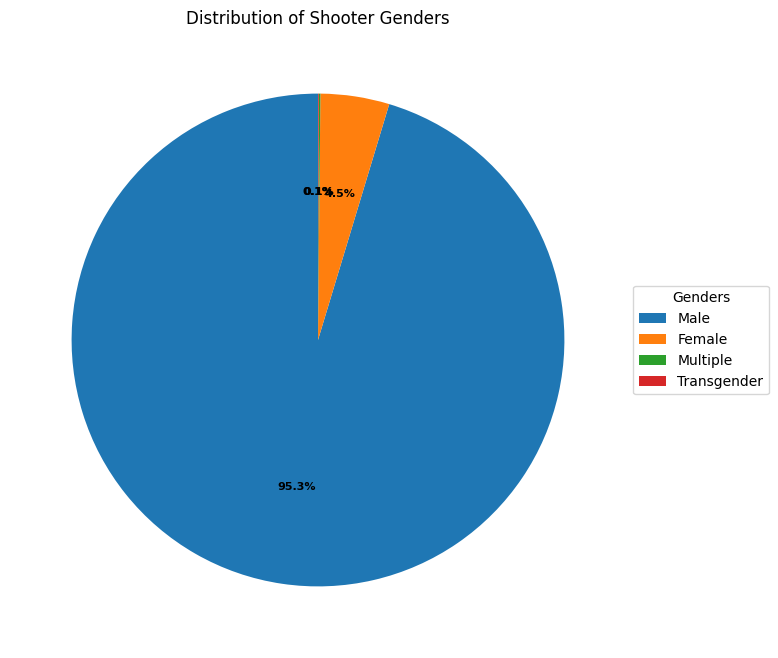

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the shooter data from the Excel file
file_path = 'ssdb_data_2022.xlsx'


# Load the shooter data from the Excel file
shooter_data = pd.read_excel('ssdb_data_2022.xlsx', sheet_name='SHOOTER')

# Count the frequency of each gender
gender_counts = shooter_data['gender'].value_counts()

# Generate the pie chart with a custom legend
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(gender_counts, autopct='%1.1f%%', startangle=90)

# Custom legend
ax.legend(wedges, gender_counts.index,
          title="Genders",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
ax.set_title('Distribution of Shooter Genders')

# Display the pie chart
plt.show()


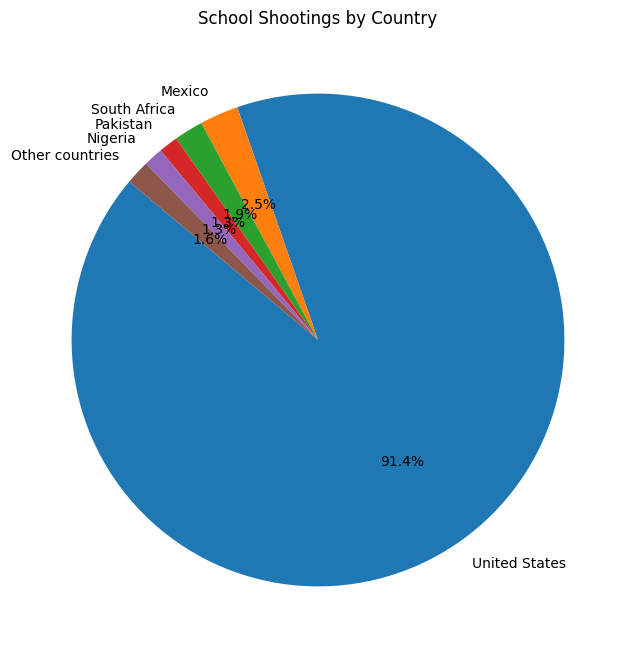

In [96]:
import matplotlib.pyplot as plt

# Data from the School Shootings By Country 2024
# You would replace this with the actual data once you have it.
countries = ['United States', 'Mexico', 'South Africa', 'Pakistan', 'Nigeria', 'Other countries']
shootings = [288, 8, 6, 4, 4, sum([2, 2, 1])]  # Sum of incidents from other countries with fewer incidents

# Ensure that the pie chart fits all labels and percentages
plt.figure(figsize=(10, 8))

# Create the pie chart
plt.pie(shootings, labels=countries, autopct='%1.1f%%', startangle=140)
plt.title('School Shootings by Country')

# Show the plot
plt.show()
